# Playing with the Quantum World

### Importing the libraries
- qiskit: Creation of circuit, simulation and transpile the circuit
- qiskit_ibm_provider: to interface with the real quantum computer
- job_monitor: to monitor the status of quantum circuit being ran in real computer

In [1]:
# Libraries for creation of circuits and simulation
from qiskit import QuantumCircuit, BasicAer, transpile
from qiskit.tools.visualization import plot_histogram
from pprint import pprint

In [2]:
# Libraries for running over the real quantum computer
from qiskit_ibm_provider import IBMProvider
from qiskit.tools.monitor import job_monitor

### Creating a simple circuit

/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


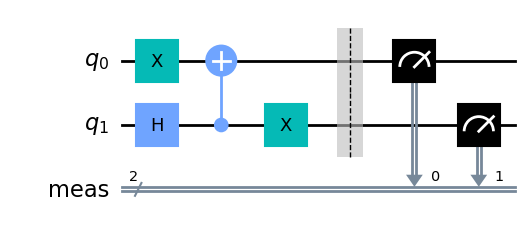

In [3]:
# creating the circuit
circuit = QuantumCircuit(2) # two qubits
circuit.h(1) # hadamard the 1st bit
circuit.x(0) # x-gate the 0th bit
circuit.cx(1,0) # 1st bit controls the state of the 0th bit
circuit.x(1) # x-gate the 1th bit
circuit.measure_all() # measure all the qubits
circuit.draw('mpl') # draw the circuit

## Simulation of the circuit

In [4]:
# simulating the circuit
# First seeing the available backends
pprint(BasicAer.backends())

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]


In [5]:
# selecting the simulator
simulator = BasicAer.get_backend('qasm_simulator')

In [6]:
# Running the simulation
tqc = transpile(circuit, simulator) # transpiling the circuit for the simulator
simulated_result = simulator.run(tqc).result() # running the transpiled circuit
result_distribution = simulated_result.get_counts() # seeing the counts

print(result_distribution)

{'11': 526, '00': 498}


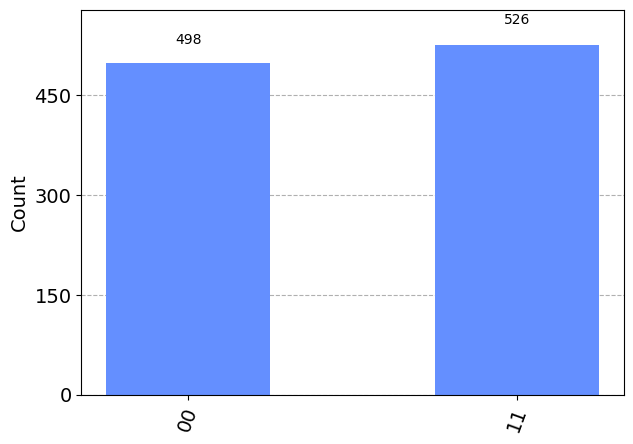

In [7]:
# plotting the histogram for seeing the distribution graphically
plot_histogram(result_distribution)

## Running in actual Quantum Computer

In [ ]:
# creating the provider object
provider = IBMProvider()

In [ ]:
# seeing the available backends
pprint(provider.backends())

In [ ]:
# selecting a quantum computer
qcomp = provider.get_backend('ibm_brisbane')

In [ ]:
# executing the circuit in the real quantum computer
tqc_real_quantum = transpile(circuit, qcomp)
job = qcomp.run(tqc_real_quantum)

In [ ]:
job_monitor(job)

In [ ]:
quantum_result = job.result()
quantum_result_counts = quantum_result.get_counts()
print(quantum_result_counts)

In [ ]:
plot_histogram(quantum_result_counts)